In [1]:
# -*- coding: utf-8 -*-
"""
A funcao 'plota' produz um gráfico da estrutura definida pela matriz de nos N 
e pela incidencia Inc.

Sugestao de uso:

from funcoesTermosol import plota
plota(N,Inc)
-------------------------------------------------------------------------------
A funcao 'importa' retorna o numero de nos [nn], a matriz dos nos [N], o numero
de membros [nm], a matriz de incidencia [Inc], o numero de cargas [nc], o vetor
carregamento [F], o numero de restricoes [nr] e o vetor de restricoes [R] 
contidos no arquivo de entrada.

Sugestao de uso:
    
from funcoesTermosol import importa
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada.xlsx')
-------------------------------------------------------------------------------
A funcao 'geraSaida' cria um arquivo nome.txt contendo as reacoes de apoio Ft, 
deslocamentos Ut, deformacoes Epsi, forcas Fi e tensoes Ti internas. 
As entradas devem ser vetores coluna.

Sugestao de uso:
    
from funcoesTermosol import geraSaida
geraSaida(nome,Ft,Ut,Epsi,Fi,Ti)
-------------------------------------------------------------------------------

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import * 
from cmath import *
import math


def plota(N,Inc):
    # Numero de membros
    nm = len(Inc[:,0])
    
    import matplotlib as mpl
    import matplotlib.pyplot as plt

#    plt.show()
    fig = plt.figure()
    # Passa por todos os membros
    for i in range(nm):
        
        # encontra no inicial [n1] e final [n2] 
        n1 = int(Inc[i,0])
        n2 = int(Inc[i,1])        

        plt.plot([N[0,n1-1],N[0,n2-1]],[N[1,n1-1],N[1,n2-1]],color='r',linewidth=3)


    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
def importa(entradaNome):

    import xlrd
    
    arquivo = xlrd.open_workbook(entradaNome)
    
    ################################################## Ler os nos
    nos = arquivo.sheet_by_name('Nos')
    
    # Numero de nos
    nn = int(nos.cell(1,3).value)
                 
    # Matriz dos nós
    N = np.zeros((2,nn))
    
    for c in range(nn):
        N[0,c] = nos.cell(c+1,0).value
        N[1,c] = nos.cell(c+1,1).value
    
    ################################################## Ler a incidencia
    incid = arquivo.sheet_by_name('Incidencia')
    
    # Numero de membros
    nm = int(incid.cell(1,5).value)
                 
    # Matriz de incidencia
    Inc = np.zeros((nm,4))
    
    for c in range(nm):
        Inc[c,0] = int(incid.cell(c+1,0).value)
        Inc[c,1] = int(incid.cell(c+1,1).value)
        Inc[c,2] = incid.cell(c+1,2).value
        Inc[c,3] = incid.cell(c+1,3).value
    
    ################################################## Ler as cargas
    carg = arquivo.sheet_by_name('Carregamento')
    
    # Numero de cargas
    nc = int(carg.cell(1,4).value)
                 
    # Vetor carregamento
    F = np.zeros((nn*2,1))
    
    for c in range(nc):
        no = carg.cell(c+1,0).value
        xouy = carg.cell(c+1,1).value
        GDL = int(no*2-(2-xouy)) 
        F[GDL-1,0] = carg.cell(c+1,2).value
         
    ################################################## Ler restricoes
    restr = arquivo.sheet_by_name('Restricao')
    
    # Numero de restricoes
    nr = int(restr.cell(1,3).value)
                 
    # Vetor com os graus de liberdade restritos
    R = np.zeros((nr,1))
    
    for c in range(nr):
        no = restr.cell(c+1,0).value
        xouy = restr.cell(c+1,1).value
        GDL = no*2-(2-xouy) 
        R[c,0] = GDL-1


    return nn,N,nm,Inc,nc,F,nr,R

def geraSaida(nome,Ft,Ut,Epsi,Fi,Ti):
    nome = nome + '.txt'
    f = open("saida.txt","w+")
    f.write('Reacoes de apoio [N]\n')
    f.write(str(Ft))
    f.write('\n\nDeslocamentos [m]\n')
    f.write(str(Ut))
    f.write('\n\nDeformacoes []\n')
    f.write(str(Epsi))
    f.write('\n\nForcas internas [N]\n')
    f.write(str(Fi))
    f.write('\n\nTensoes internas [Pa]\n')
    f.write(str(Ti))
    f.close()

def jacobi(ite, tol, K, F):
    tam = len(K)

    xs=np.zeros(tam)
    ultimos=np.zeros(tam)
    erro=np.zeros(tam)
    
    for i in range(0, ite):
        for k in range(0, tam):
            soma = 0
            
            for j in range(0, tam):
                if k != j:
                    soma += (K[k][j]*xs[j])
            
            xs[k] = (F[k] - soma)/K[k][k]
            if K[k][k] == 0:
                xs[k] = 0
        
        for g in range(0, tam):
            erro[g] = (xs[g] - ultimos[g])/xs[g]
            
            if xs[g] == 0:
                erro[g] = 0
           
        count = 0
        for l in range(0, tam):
            if erro[l] < tol:
                count+=1

        if count == tam:
            break

        for x in range(0, tam):
            ultimos[x] = xs[x]
    return xs


#Gauss
def gauss(ite, tol, K, F):

    tam = len(K)

    xs=np.zeros(tam)
    ultimos=np.zeros(tam)
    erro=np.zeros(tam)
    
    for i in range(0, ite):
        for k in range(0, tam):
            soma = 0
            
            for j in range(0, tam):
                if k != j:
                    soma += (K[k][j]*xs[j])
            
            xs[k] = (F[k] - soma)/K[k][k]
            if K[k][k] == 0:
                xs[k] = 0
        
        for g in range(0, tam):
            erro[g] = (xs[g] - ultimos[g])/xs[g]
            
            if xs[g] == 0:
                erro[g] = 0
           
        count = 0
        for l in range(0, tam):
            if erro[l] < tol:
                count+=1

        if count == tam:
            break

        for x in range(0, tam):
            ultimos[x] = xs[x]
    return xs


def rigidez_deformacao(nm, Inc, N, nn, R, F, nr):


    elementos = {}

    k_matrix = []
    k_gdls = []

    for n in range(0, nm):
        elementos[n] = {}
        elementos[n]['no1'] = int(Inc[n,0])
        elementos[n]['no2'] = int(Inc[n,1])
        elementos[n]['E'] = Inc[n,2]
        elementos[n]['A'] = Inc[n,3]
        elementos[n]['L'] = math.sqrt((N[0,elementos[n]['no1']-1]-N[0,elementos[n]['no2']-1])**2 + (N[1,elementos[n]['no1']-1]-N[1,elementos[n]['no2']-1])**2)
        elementos[n]['cos'] = (N[0,elementos[n]['no2']-1]-N[0,elementos[n]['no1']-1])/elementos[n]['L']
        elementos[n]['sen'] = (N[1,elementos[n]['no2']-1]-N[1,elementos[n]['no1']-1])/elementos[n]['L']
        elementos[n]['gdl'] = [2*elementos[n]['no1']-2, 2*elementos[n]['no1']-1, 2*elementos[n]['no2']-2, 2*elementos[n]['no2']-1]

        cos = elementos[n]['cos']
        sen = elementos[n]['sen']
        E = elementos[n]['E']
        A = elementos[n]['A']
        L = elementos[n]['L']

        k_gdls.append(elementos[n]['gdl'])

        K = [[cos**2, cos*sen, -1*(cos**2), -1*(cos*sen)],
             [cos*sen, sen**2, -1*(cos*sen), -1*(sen**2)],
             [-1*(cos**2), -1*(cos*sen), cos**2, cos*sen],
             [-1*(cos*sen), -1*(sen**2), cos*sen, sen**2]]

        c = int(E*A/L)

        k1 = []
        k2 = []

        for i in range(0, len(K)):
            for j in range(0, len(K[i])):
                k1.append(c*K[i][j])
            k2.append(k1)
            k1 = []

        k_matrix.append(k2)

    kg = np.zeros((nn*2,nn*2))

    for i in range(0, nn*2):
        for j in range(0, nn*2):
            soma=0
            for k in range(0, nm):
                if i in k_gdls[k] and j in k_gdls[k]:
                    soma += k_matrix[k][k_gdls[k].index(i)][k_gdls[k].index(j)]
            kg[i][j]=soma
    load_list = []

    for i in range(0, nn*2):
        load_list.append(F[i][0])
        

    Gm = []
    Gf = []
    
    for i in range(0, nn*2):
        if i not in R:
            Gf.append(load_list[i])
           
            aux_list = []

            for j in range(0, nn*2):
                if j not in R:
                    aux_list.append(kg[i][j])
            
            Gm.append(aux_list)
    


    xs = gauss(3000, 1e-7, Gm, Gf)
    

    for i in range (nr):
        xs = np.insert(xs, int(R[i][0]), 0, 0)
          
    return xs, kg, elementos
    





def support(R,nr,nn,kg,xs):
    sup=R
    nc=2*nn
    for i in range(0,nr):
        a=int(R[i][0])
        for x in range(0,nc):
            sup[i]+=xs[x]*kg[a][x]
        
    return sup,xs


def deformacao(xs, elementos):
    deform = np.zeros((len(elementos),1))
    
    for n in range(0,len(elementos)):
        n1 = elementos[n]['no1']
        n2 = elementos[n]['no2']

        x_n1 = xs[(n1 - 1)*2]
        x_n2 = xs[(n2 - 1)*2]
        y_n1 = xs[(n1*2)-1]
        y_n2 = xs[(n2*2)-1]

        l = elementos[n]["L"]
        cos = elementos[n]["cos"]
        sen = elementos[n]["sen"]

        d = (-cos*x_n1 - sen*y_n1 + cos*x_n2 + sen*y_n2)/l

        deform[n] = d

    return deform

def tension(deforms, elementos):
    
    tens=np.zeros((len(elementos),1))
    
    for n in range(0,len(deforms)):
        youngs = int(elementos[n]["E"])
        tens[n] = deforms[n]*youngs

    return tens

def internas(tens, elementos):
    interns = np.zeros((len(elementos),1))
    for n in range(0,len(elementos)):
        area = float(elementos[n]["A"])

        interns[n] = tens[n]*area

    return interns

def new_nodes(N, u):

    new = N
    
    rows, cols = N.shape

    for c in range(cols):
        for r in range(rows):
            new[r][c] += u[c*rows + r]

    return new


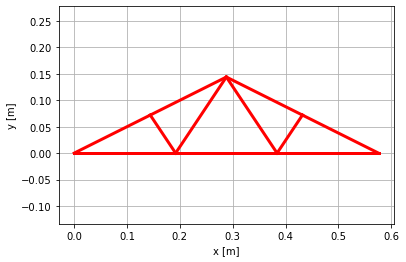

In [2]:
nn,N,nm,Inc,nc,F,nr,R=importa("entrada_validacao.xlsx")
plota(N,Inc)

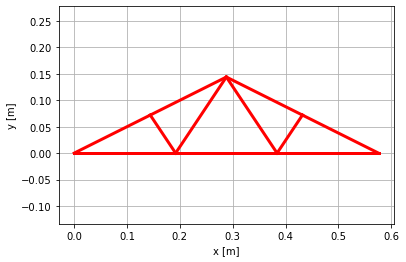

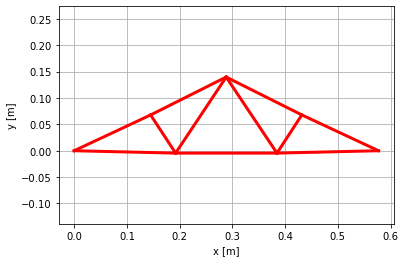

In [3]:
def solver():
    # nn = Número de nós
    # N = Matriz com a posição dos nós em metros
    # nm = Número de membros
    # Inc = Matriz com os membros, módulos de elasticidade (Pa) e áreas (m2)
    # nc = Número de cargas (forças)
    # F = Matriz com a posição das forças e os módulos
    # nr = Número de restrições
    # R = Matriz com a posição de cada restrição
    nn, N, nm, Inc, nc, F, nr, R = importa('entrada_validacao.xlsx')

    plota(N, Inc)

    xs, kg, elementos = rigidez_deformacao(nm, Inc, N, nn, R, F, nr)
    
    apoios, u = support(R, nr, nn, kg, xs)

    deforma = deformacao(u, elementos)

    tens = tension(deforma, elementos)

    interns = internas(tens, elementos)

    novos = new_nodes(N, u)

    plota(novos, Inc)

    new_xs = np.zeros((len(xs), 1))
    for i in range(len(xs)):
        new_xs[i][0] = xs[i]

    geraSaida("saida", apoios, new_xs, deforma, interns, tens)
    
solver()


200000000000.0